In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import FinanceDataReader as fdr
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import warnings
import pandas_ta as ta
import numpy as np
from tqdm import tqdm
import numpy as np
from datetime import datetime

warnings.filterwarnings('ignore')

In [58]:
import os, sys
os.path.dirname(__file__)

NameError: name '__file__' is not defined

In [60]:
from ..function import cryptopen

ImportError: attempted relative import with no known parent package

In [44]:
path = "../btc_usd_1d.pkl"
cryptopen(path)

ImportError: attempted relative import with no known parent package

In [36]:
df

,Open,High,Low,Close,Volume,Datetime
Datetime,,,,,,
2017-01-01,966.34,1005.00,960.53,998.80,6.579904e+06,2017-01-01
2017-01-02,997.75,1032.00,990.01,1014.10,8.190255e+06,2017-01-02
2017-01-03,1011.44,1039.00,999.99,1036.99,8.955193e+06,2017-01-03
2017-01-04,1035.51,1139.89,1028.56,1122.56,2.325716e+07,2017-01-04
2017-01-05,1114.38,1136.72,885.41,994.02,3.503690e+07,2017-01-05
...,...,...,...,...,...,...
2022-05-12,29077.90,30257.00,26631.00,29020.70,9.644756e+05,2022-05-12
2022-05-13,29020.80,31072.60,28730.40,29274.30,5.076201e+05,2022-05-13
2022-05-14,29274.20,30352.20,28602.30,30079.80,3.157569e+05,2022-05-14


In [4]:
adx = df.ta.adx()
macd = df.ta.macd(fast=14, slow=24)
rsi = df.ta.rsi()
df = pd.concat([df, adx, macd, rsi], axis=1)
df

KeyError: 0

In [273]:
predict_df = df
predict_df['y_true'] = predict_df['Close'].shift(-1)
predict_df = predict_df[:-1]

In [274]:
#결측치 처리
predict_df2 = predict_df.dropna(axis=1, how='all')
predict_df3 = predict_df2.interpolate(method='values')
predict_df4 = predict_df3.dropna(axis=0, how='any')
predict_df5 = predict_df4.drop(['High', 'Low'], axis=1)

In [275]:
predict_df5

,Open,Close,Volume,ADX_14,DMP_14,DMN_14,MACD_14_24_9,MACDh_14_24_9,MACDs_14_24_9,RSI_14,y_true
Date,,,,,,,,,,,
2014-12-30,314.78,311.94,3.091942e+06,44.543149,12.188244,24.976617,-11.573311,1.105185,-12.678496,34.611274,319.25
2014-12-31,311.94,319.25,1.925335e+06,42.860024,13.557753,23.456745,-10.952898,1.380479,-12.333377,40.274141,316.31
2015-01-01,319.25,316.31,1.018388e+06,41.151907,13.465472,22.147240,-10.498190,1.468149,-11.966339,38.818072,316.51
2015-01-02,316.31,316.51,1.093572e+06,39.720462,12.995754,21.816757,-10.012990,1.562680,-11.575669,38.979693,286.01
2015-01-03,316.51,286.01,6.078845e+06,40.867059,10.523551,33.906682,-11.145985,0.343748,-11.489732,27.185538,264.62
...,...,...,...,...,...,...,...,...,...,...,...
2022-01-19,42378.23,41683.21,1.664704e+03,37.131543,11.309081,26.652611,-1164.589697,100.170269,-1264.759966,34.987583,40736.05
2022-01-20,41733.21,40736.05,2.425153e+03,36.482955,13.406530,23.860391,-1198.539878,52.976070,-1251.515948,31.925471,36495.46
2022-01-21,40654.72,36495.46,6.201046e+03,37.647700,11.019279,35.662082,-1438.989864,-149.979133,-1289.010731,22.451374,35091.11


In [276]:
col_dict = predict_df5.columns
col_dict

Index(['Open', 'Close', 'Volume', 'ADX_14', 'DMP_14', 'DMN_14', 'MACD_14_24_9',
       'MACDh_14_24_9', 'MACDs_14_24_9', 'RSI_14', 'y_true'],
      dtype='object')

In [277]:
from sklearn.model_selection import train_test_split
data = predict_df5[col_dict[:-1]]
target = predict_df5['y_true']
x_train, x_valid, y_train, y_valid = train_test_split(data, target, test_size=0.2, shuffle=False)

model = LinearRegression()
LR = model.fit(x_train, y_train)
y_pred = model.predict(x_valid)

In [278]:
predict_df6 = predict_df5
#predict_df6 = predict_df5.drop(['PCTRET_1','LOGRET_1'], axis=1)
col_dict = predict_df6.columns

data = predict_df6[col_dict[:-1]]
target = predict_df5['y_true']
x_train, x_valid, y_train, y_valid = train_test_split(data, target, test_size=0.2, shuffle=False)

model = LinearRegression()
LR = model.fit(x_train, y_train)
y_pred = model.predict(x_valid)

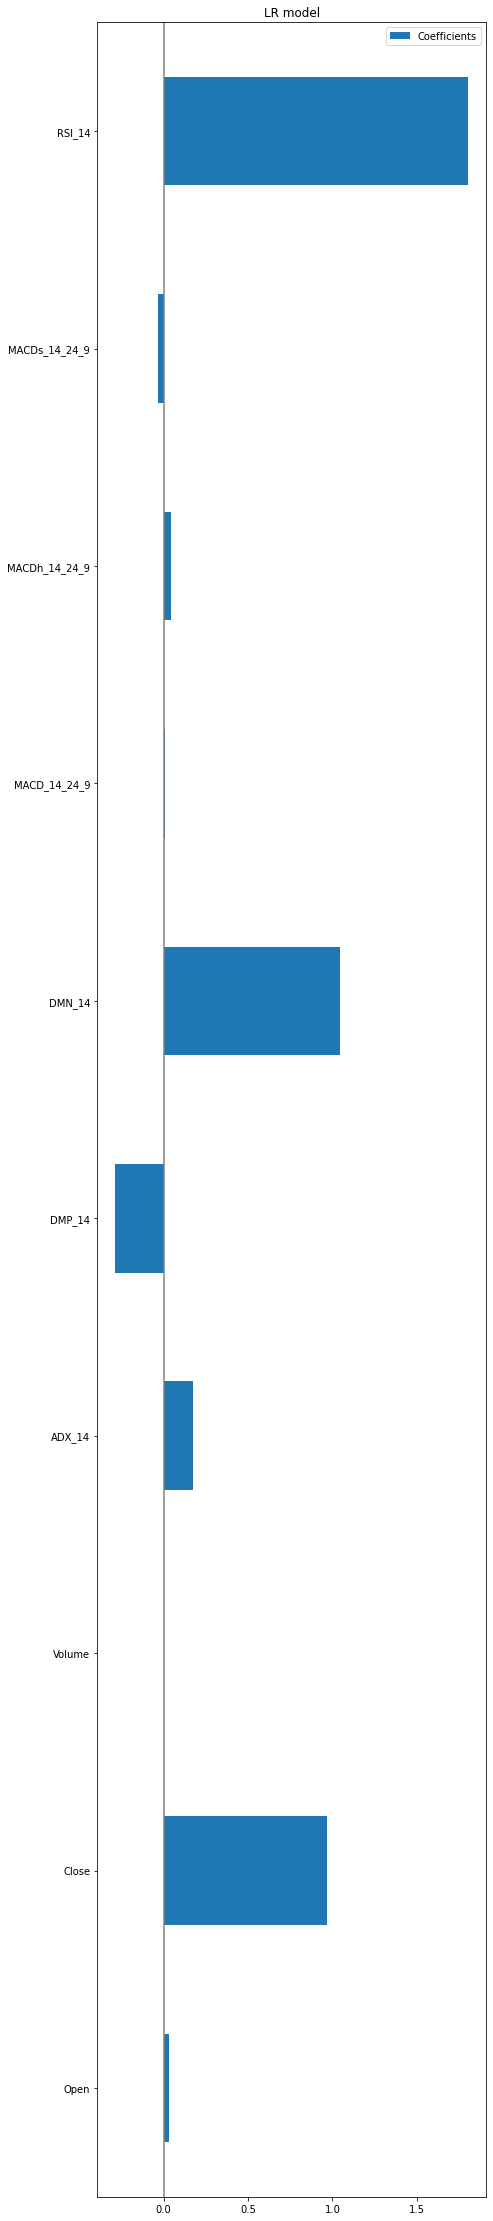

In [279]:
coefs = pd.DataFrame(
   model.coef_,
   columns=['Coefficients'], index=x_train.columns
)

coefs.plot(kind='barh', figsize=(9, 40))
plt.title('LR model')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

In [280]:
diff = np.mean(np.abs(LR.predict(x_valid)-y_valid)/y_valid)
diff

0.028796094756463154

In [281]:
def batch(iterable, batch_size, pt):
    """
    batch row 생성 이터레이터
    Args:
        iterable: iterable datastructure
        batch_size:
        pt: prediction term 예측 기간
    Returns:
        yield: batch row
    """

    l = len(iterable)
    for idx, ndx in tqdm(enumerate(range(0, l, pt))):
        yield idx, iterable[ndx: min(ndx + batch_size, l)]


def backtest_LR_1d(test_df: pd.DataFrame, ft: int, pt: int, plot=True) -> pd.DataFrame:
    """

    Args:
        test_df: 1시간 봉 데이터
        ft: fitting term 피팅 시킬 기간
        pt: prediction term 예측 기간
        arima_params:
    Returns:
        df: 예측 값이 열로 포함된 DataFrame
    """
    df = test_df.copy()
    batch_size = ft + pt
    total_loop = int(len(df) / pt) - 1
    result_columns = list(df.columns)
    result_columns.append("prediction_close")

    result_df = pd.DataFrame(columns=result_columns)

    try:
        for idx, batch_df in batch(df, batch_size, pt):
            # print(f'{idx}/{total_loop} running loop...')
            train, test = batch_df[:ft-1], batch_df[ft-1:ft]
            X_train, y_train = train.drop('y_true',axis=1,inplace=False),train['y_true']
            X_test, y_test = test.drop('y_true',axis=1,inplace=False),test['y_true']
            LR = LinearRegression()
            LR.fit(X_train, y_train)
            pred = LR.predict(X_test)
            if len(pred) ==0:
                break
            row = batch_df.iloc[[-1]]
            row['prediction_close'] = pred
            row['batch_open'] = batch_df.iloc[ft].Open
            result_df = pd.concat([result_df, row], axis=0)

    except IndexError:
        pass
    result_df['trade'] = np.where(result_df['batch_open'] < result_df['prediction_close'], 1, 0)
    result_df['ror'] = np.where(result_df['trade'] == 1, result_df['Close'] / result_df['batch_open'], 1)
    result_df['cr'] = result_df['ror'].cumprod()
    result_df['mdd'] = (result_df['cr'].cummax() - result_df['cr']) / result_df['cr'].cummax() * 100

    if plot:
        plot_result(result_df)
        plot_return(result_df)

    return result_df

def plot_result(df):
    plt.figure(figsize=(20, 8))
    l=list(df.index)
    for i in range(len(l)):
        l[i]=datetime.strptime(str(l[i])[:10],'%Y-%m-%d')
    plt.plot(l, df['Close'].values, color='b', label='real close')
    plt.plot(l, df['prediction_close'].values , color='r', label='prediction close')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_return(df):
    plt.figure(figsize=(20, 8))
    l=list(df.index)
    for i in range(len(l)):
        l[i]=datetime.strptime(str(l[i])[:10],'%Y-%m-%d')
    plt.plot(l, df['cr'].values , color='r', label='return')
    plt.legend()
    plt.title(
        f"mdd: {round(df['mdd'].max(), 2)}\nreturn_rate: {round(df['cr'].iloc[-1] * 100 - 100, 2)}%")
    plt.grid(True)
    plt.show()


def analysis_return(test_df):
    # ror: 일일 수익률
    # trading_rate: 거래 확률
    # success_rate: 거래 성공 확률
    # pnl_rate: 손익비
    # mdd: 최대 손실 낙폭
    # cr: 누적 수익률

    df = test_df.copy()
    df['success'] = np.where((df['ror'] > 1) & (df['trade'] == 1), 1, 0)
    df['fail'] = np.where((df['ror'] < 1) & (df['trade'] == 1), 1, 0)
    df['success_ror'] = np.where(df['success'], (df['ror'] - 1) * 100, 0)
    df['fail_ror'] = np.where(df['fail'], (1 - df['ror']) * 100, 0)

    trade_rate = df['trade'].sum() / len(df)
    success_rate = df['success'].sum() / df['trade'].sum()
    pnl_rate = df['success_ror'].sum() / df['fail_ror'].sum()
    mdd = df['mdd'].max()
    cr = df['cr'].iloc[-1]

    return_dict = {}
    return_dict['trade_rate'] = f'{trade_rate * 100: .2f}%'
    return_dict['success_rate'] = f'{success_rate * 100: .2f}%'
    return_dict['pnl_rate'] = f'{pnl_rate: .2f}'
    return_dict['mdd'] = f'{mdd: .2f}%'
    return_dict['cr'] = f'{(cr - 1) * 100: .2f}%'

    return return_dict

2482it [00:46, 53.51it/s]


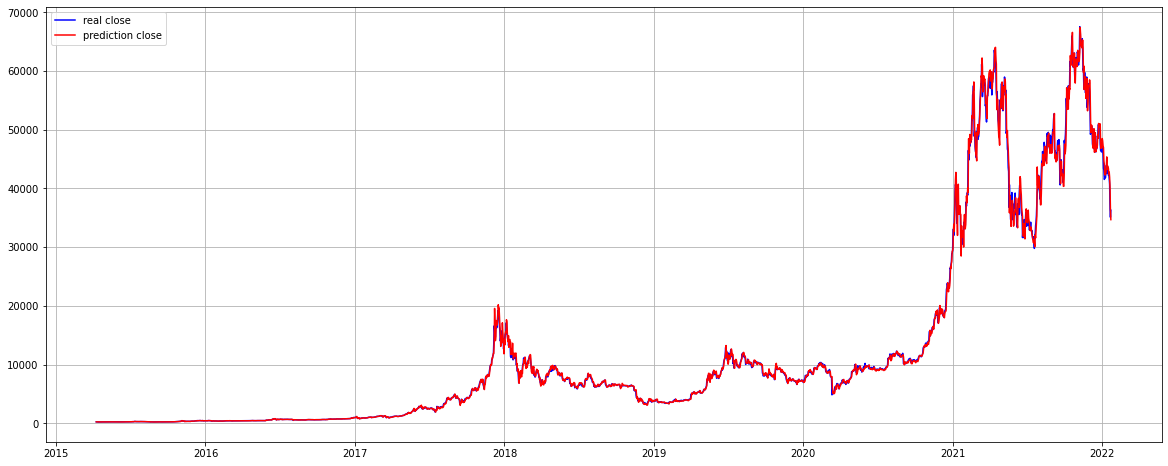

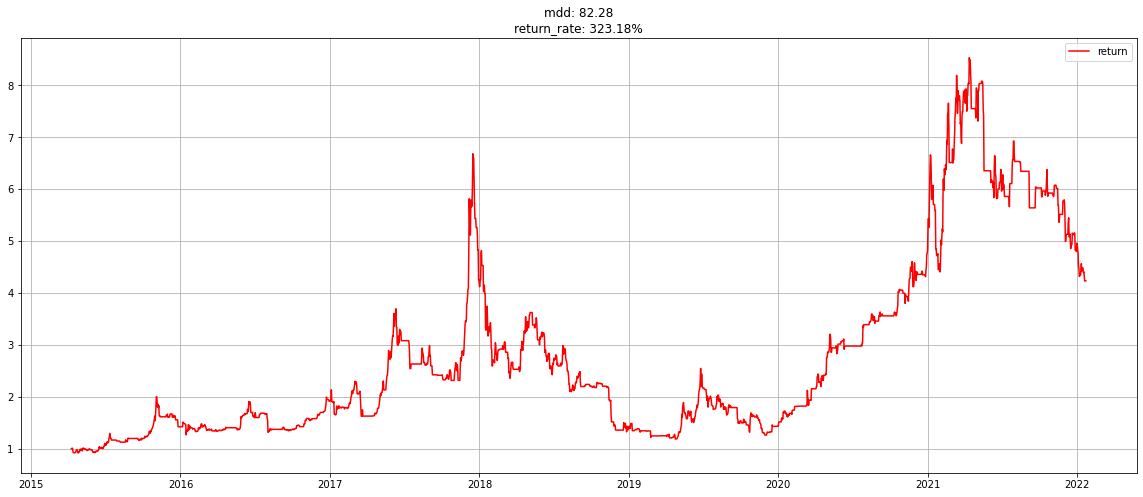

In [308]:
day100 = backtest_LR_1d(predict_df6, 100, 1)

In [310]:
day100

,Open,Close,Volume,ADX_14,DMP_14,DMN_14,MACD_14_24_9,MACDh_14_24_9,MACDs_14_24_9,RSI_14,y_true,prediction_close,batch_open,trade,ror,cr,mdd
2015-04-09,244.09,243.53,1944122.48,17.682203,17.09392,26.001988,-2.722965,-0.249911,-2.473054,40.897757,234.77,245.863618,244.09,1,0.997706,0.997706,0.0
2015-04-10,243.53,234.77,2722903.56,18.550113,15.575853,28.819491,-3.417033,-0.755184,-2.66185,35.942214,237.34,243.125175,243.53,0,1,0.997706,0.0
2015-04-11,234.77,237.34,968919.7,19.356011,14.870262,27.513958,-3.796922,-0.908058,-2.888864,38.304115,236.3,234.97166,234.77,1,1.010947,1.008628,0.0
2015-04-12,237.34,236.3,672985.92,20.10433,14.423095,26.68658,-4.114786,-0.980738,-3.134049,37.69836,222.87,238.34481,237.34,1,0.995618,1.004208,0.43819
2015-04-13,236.3,222.87,3166493.61,21.852587,12.685234,33.090847,-5.040606,-1.525246,-3.51536,30.902138,216.42,238.577958,236.30,1,0.943165,0.947134,6.096739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-19,42378.23,41683.21,1664.704053,37.131543,11.309081,26.652611,-1164.589697,100.170269,-1264.759966,34.987583,40736.05,42785.262125,42378.23,1,0.9836,4.335403,49.193283
2022-01-20,41733.21,40736.05,2425.152607,36.482955,13.40653,23.860391,-1198.539878,52.97607,-1251.515948,31.925471,36495.46,41912.365647,41733.21,1,0.976106,4.231814,50.407243
2022-01-21,40654.72,36495.46,6201.046101,37.6477,11.019279,35.662082,-1438.989864,-149.979133,-1289.010731,22.451374,35091.11,40167.98787,40654.72,0,1,4.231814,50.407243
2022-01-22,36447.37,35091.11,4510.372186,39.043284,10.061452,36.939164,-1690.258094,-320.99789,-1369.260204,20.302622,36293.62,36390.711717,36447.37,0,1,4.231814,50.407243


In [345]:
from sklearn.metrics import mean_squared_error
min_max_scaler = MinMaxScaler()
temp_day100 = day100[['Close', 'prediction_close']]
temp_day100 = (temp_day100 - temp_day100.mean())/temp_day100.std()
temp_day100.head()

,Close,prediction_close
2015-04-09,-0.716946,-0.716295
2015-04-10,-0.717486,-0.716463
2015-04-11,-0.717327,-0.716964
2015-04-12,-0.717391,-0.716757
2015-04-13,-0.718218,-0.716743


In [346]:
y = temp_day100['Close']
y_pred = temp_day100['prediction_close']
RMSE = mean_squared_error(y, y_pred)**0.5
RMSE

0.05550871356279063

---

2557it [00:47, 53.43it/s]


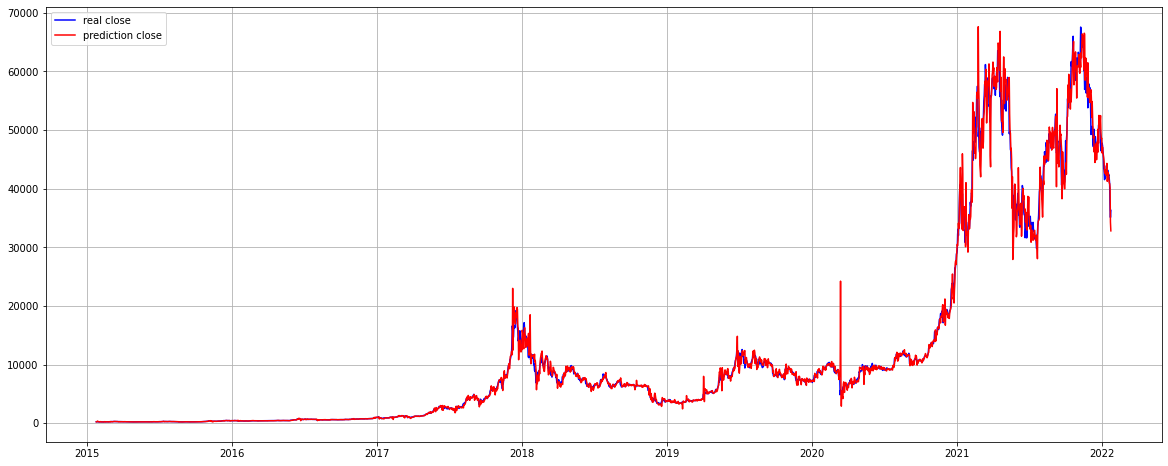

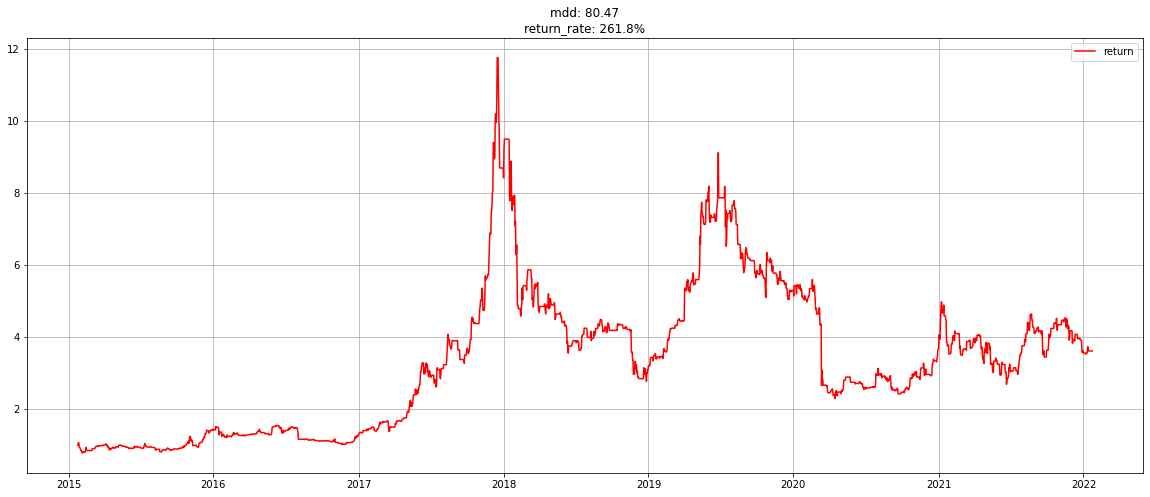

{'trade_rate': ' 53.07%',
 'success_rate': ' 53.28%',
 'pnl_rate': ' 1.14',
 'mdd': ' 80.47%',
 'cr': ' 261.80%'}

In [289]:
day25 = backtest_LR_1d(predict_df6, 25, 1)
analysis_return(day25)

2532it [00:45, 55.53it/s]


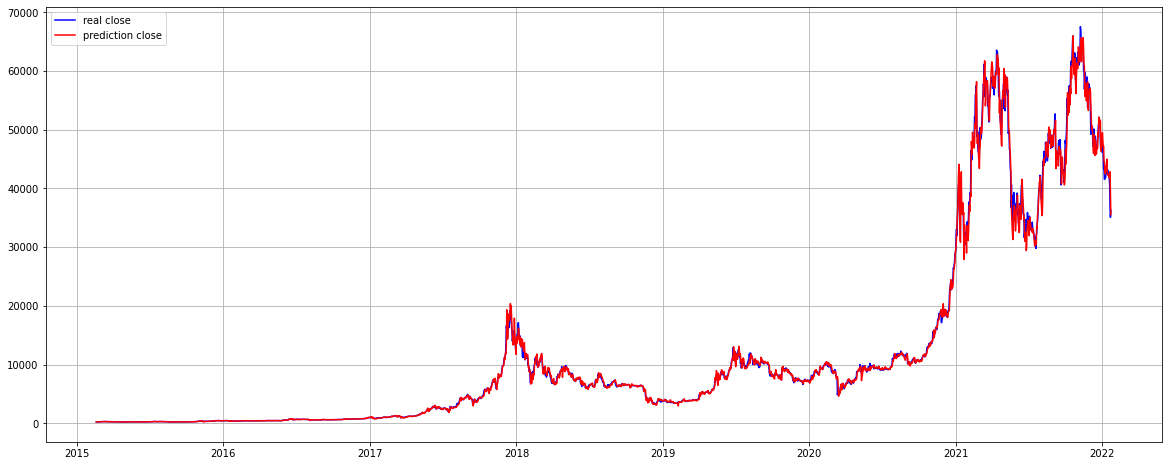

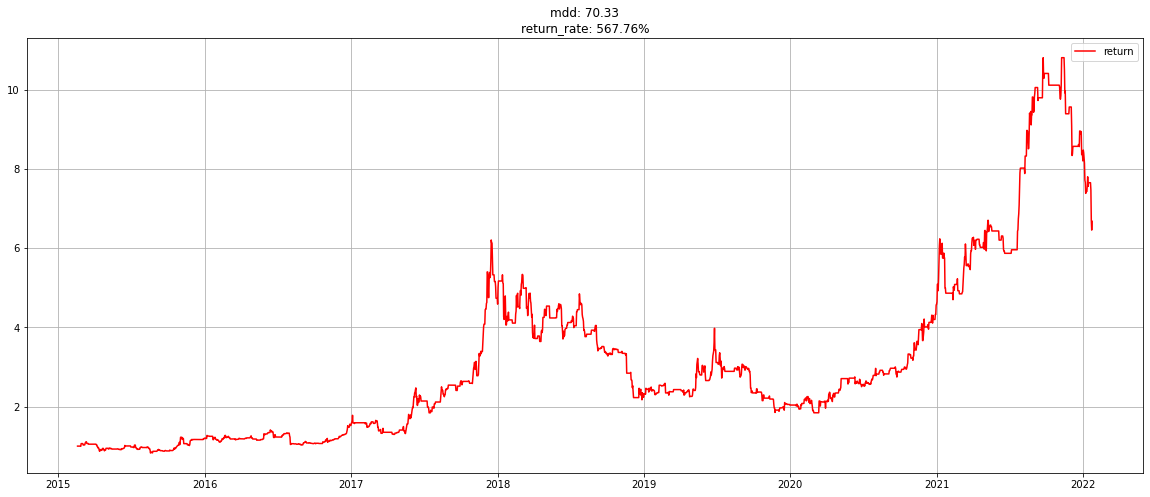

{'trade_rate': ' 49.25%',
 'success_rate': ' 53.33%',
 'pnl_rate': ' 1.19',
 'mdd': ' 70.33%',
 'cr': ' 567.76%'}

In [290]:
day50 = backtest_LR_1d(predict_df6, 50, 1)
analysis_return(day50)

2382it [00:44, 53.51it/s]


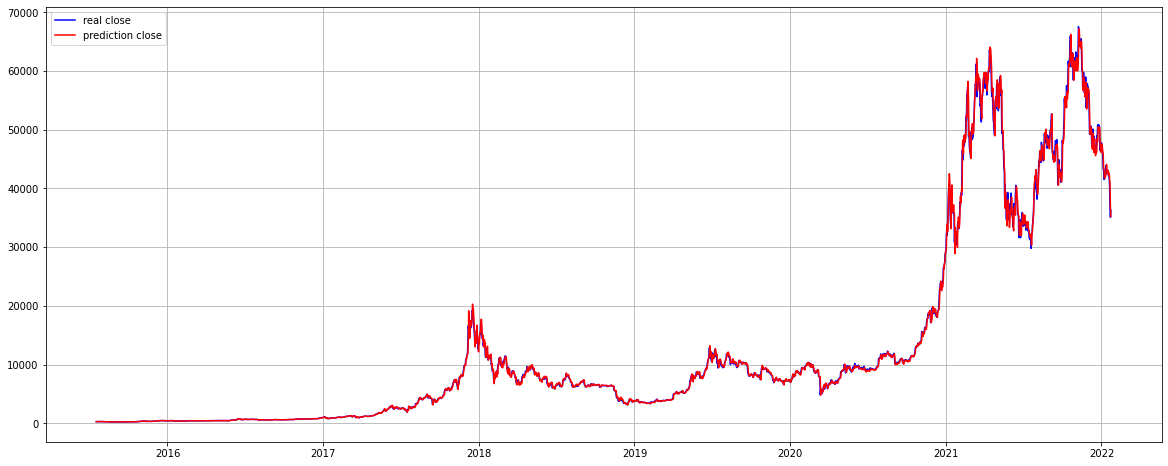

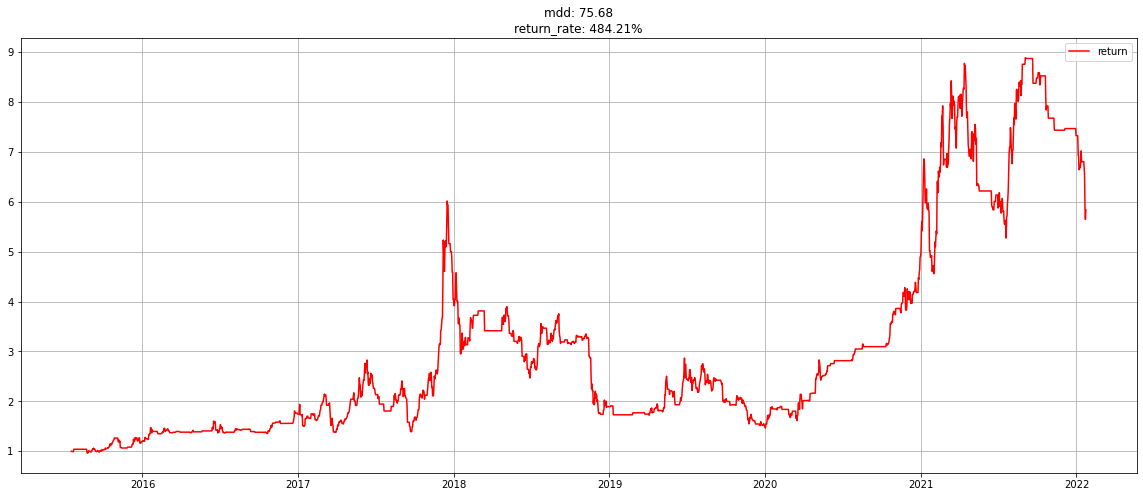

{'trade_rate': ' 51.85%',
 'success_rate': ' 54.17%',
 'pnl_rate': ' 1.18',
 'mdd': ' 75.68%',
 'cr': ' 484.21%'}

In [291]:
day200 = backtest_LR_1d(predict_df6, 200, 1)
analysis_return(day200)

2282it [00:40, 56.08it/s]


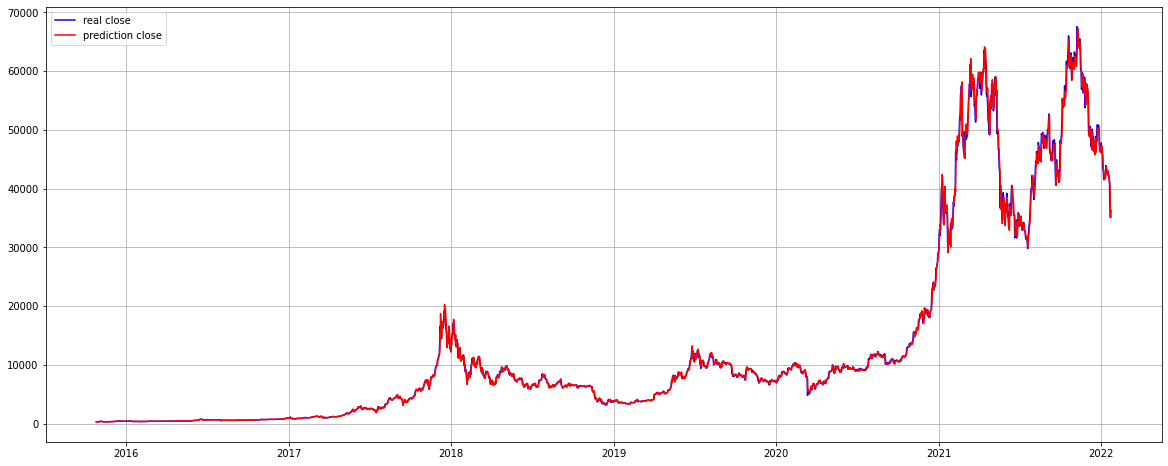

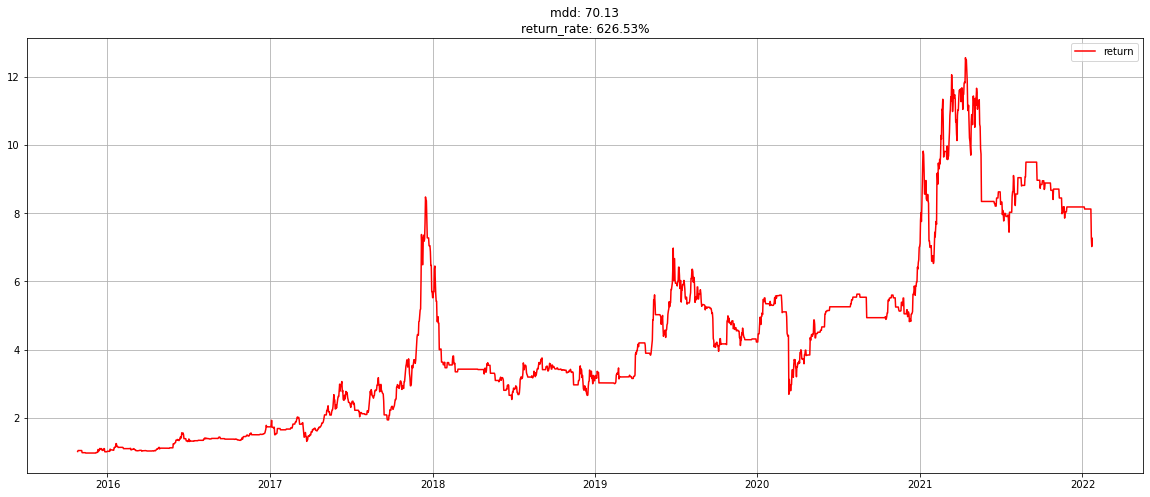

{'trade_rate': ' 51.10%',
 'success_rate': ' 54.55%',
 'pnl_rate': ' 1.20',
 'mdd': ' 70.13%',
 'cr': ' 626.53%'}

In [292]:
day300 = backtest_LR_1d(predict_df6,300, 1)
analysis_return(day300)

2182it [00:38, 56.14it/s]


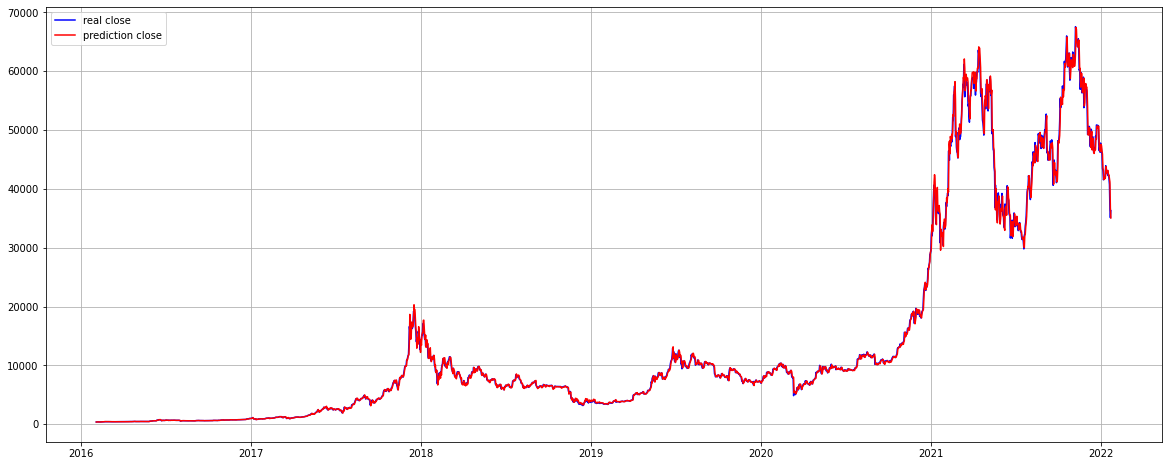

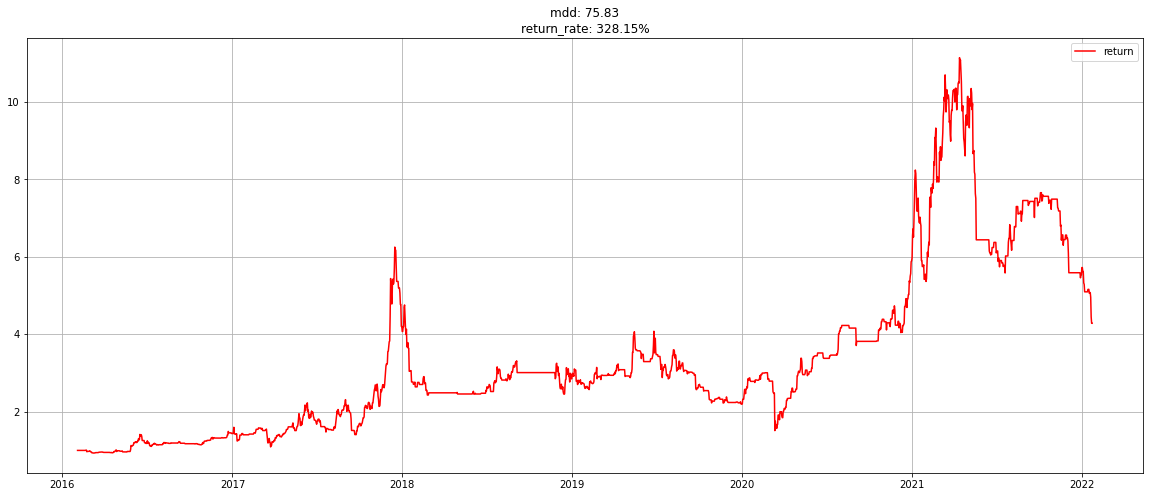

{'trade_rate': ' 49.91%',
 'success_rate': ' 54.09%',
 'pnl_rate': ' 1.17',
 'mdd': ' 75.83%',
 'cr': ' 328.15%'}

In [293]:
day400 = backtest_LR_1d(predict_df6, 400, 1)
analysis_return(day400)

2082it [00:39, 53.23it/s]


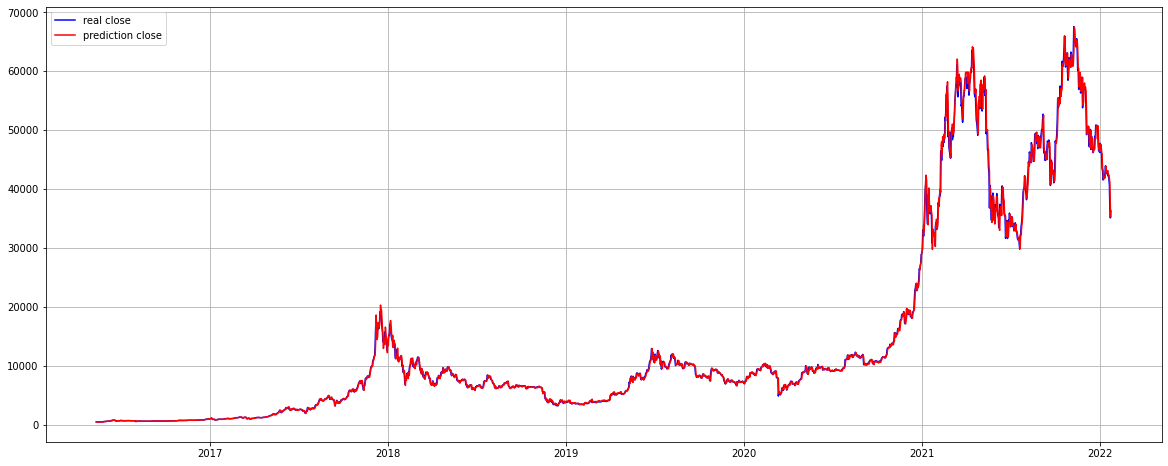

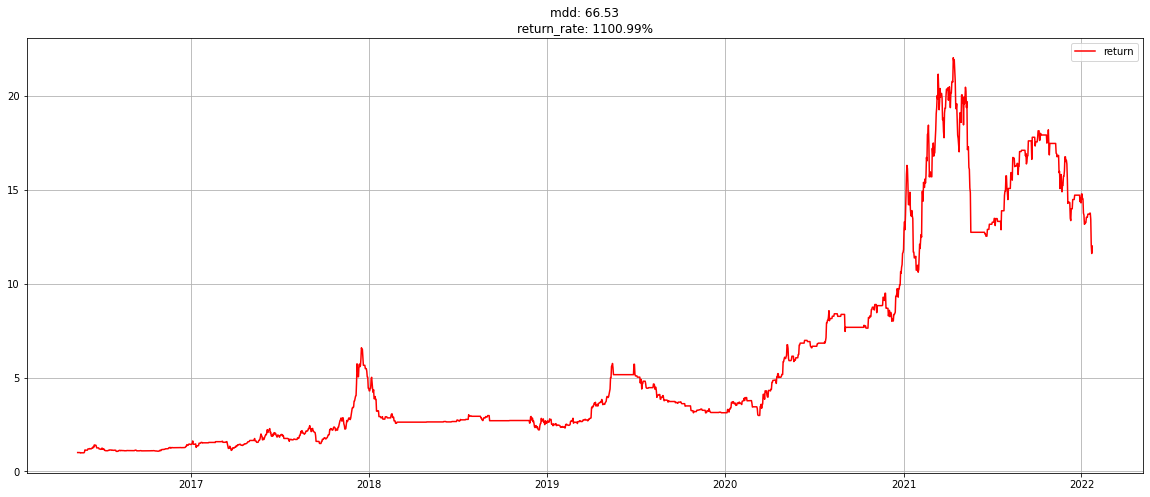

{'trade_rate': ' 50.48%',
 'success_rate': ' 54.90%',
 'pnl_rate': ' 1.25',
 'mdd': ' 66.53%',
 'cr': ' 1100.99%'}

In [347]:
day500 = backtest_LR_1d(predict_df6, 500, 1)
analysis_return(day500)

1832it [00:33, 55.48it/s]


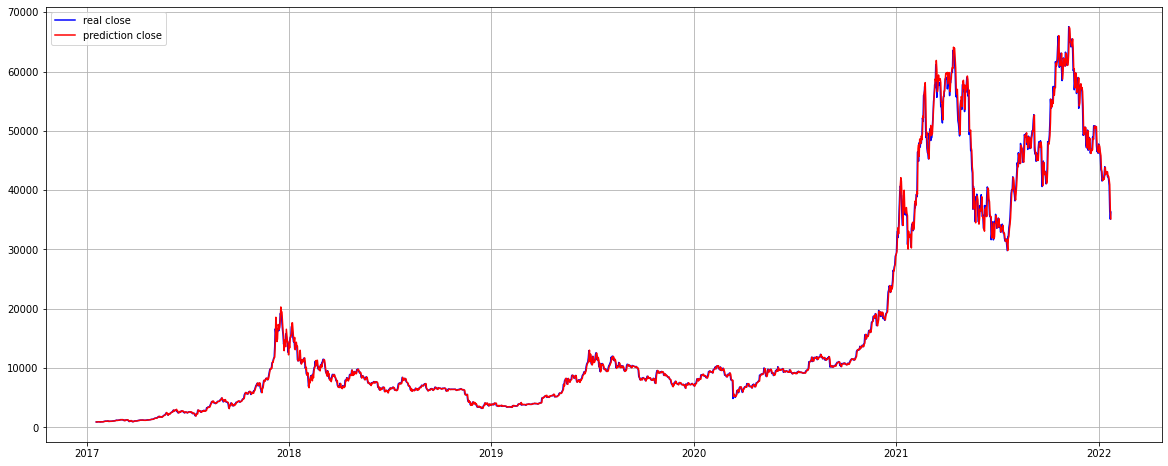

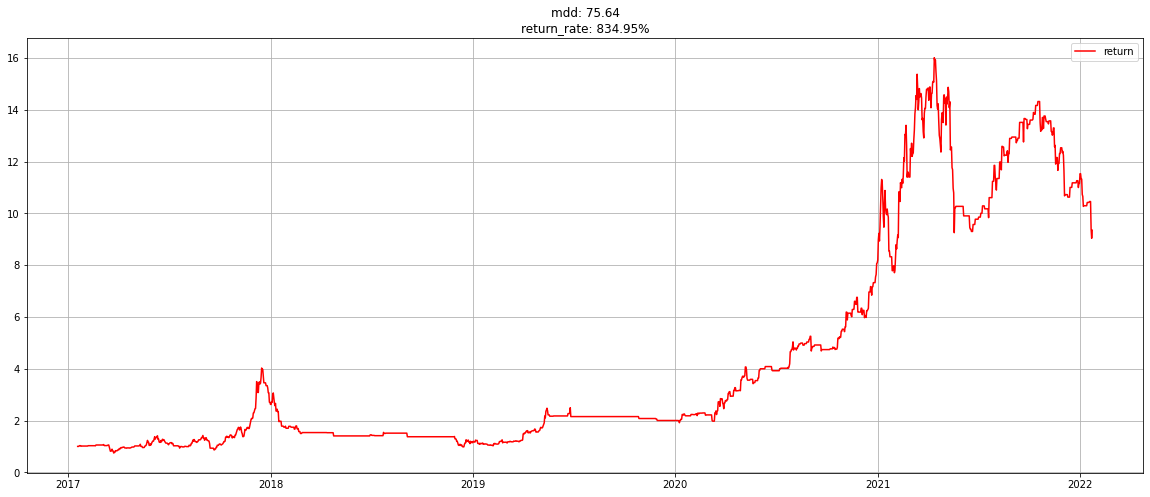

{'trade_rate': ' 44.87%',
 'success_rate': ' 55.23%',
 'pnl_rate': ' 1.27',
 'mdd': ' 75.64%',
 'cr': ' 834.95%'}

In [295]:
day750 = backtest_LR_1d(predict_df6, 750, 1)
analysis_return(day750)

1582it [00:28, 56.38it/s]


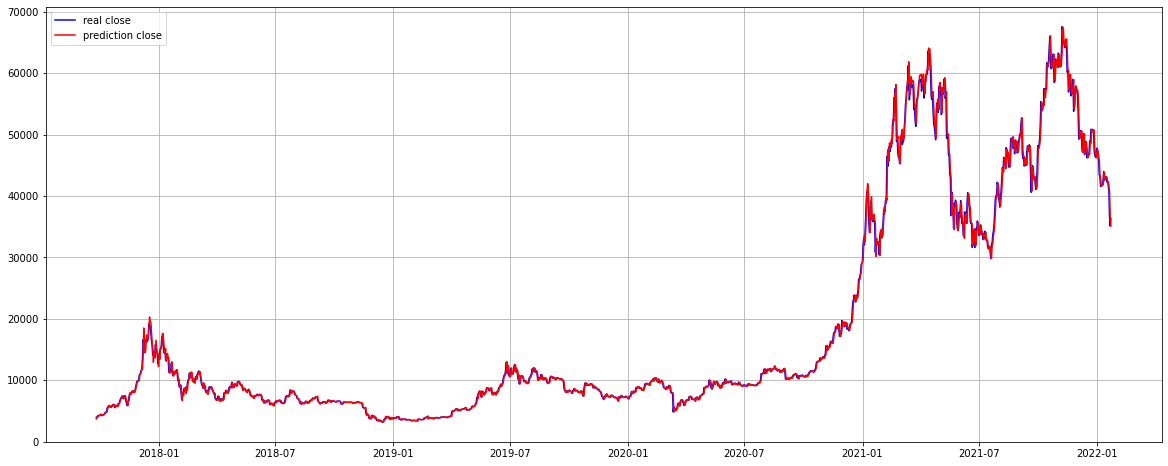

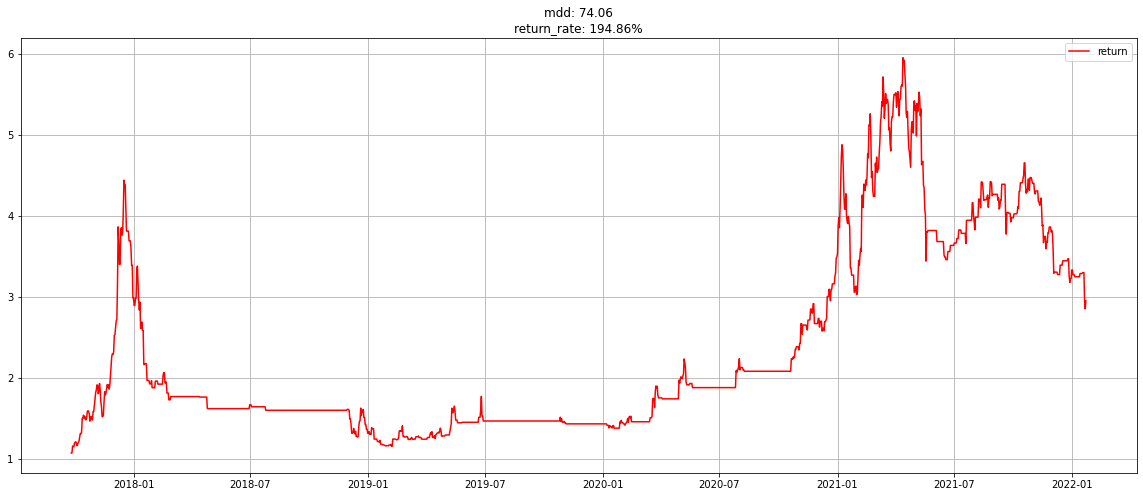

{'trade_rate': ' 36.85%',
 'success_rate': ' 52.49%',
 'pnl_rate': ' 1.20',
 'mdd': ' 74.06%',
 'cr': ' 194.86%'}

In [296]:
day1000 = backtest_LR_1d(predict_df6, 1000, 1)
analysis_return(day1000)